# Analyse descriptives des données "Openfoodfacts"

In [1]:
# importation des librairies nécessaires

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("Set2")
sns.set_theme("notebook")

In [3]:
filepath = 'openfoodfacts_clean_mean.csv'

In [4]:
df = pd.read_csv(filepath)
df.head(3)

,code,url,creator,product_name,quantity,brands,categories,countries,ingredients_text,serving_size,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,created_date,created_years,last_modified_date,last_modified_years
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,Nutrinet-sante,Jeunes pousses,NaN,Endives,NaN,France,NaN,NaN,...,25.343409,8.283347,2.095763,7.611919,0.783095,0.313238,2021-06-16,2021,2021-06-16,2021
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,Kiliweb,Vitória crackers,NaN,NaN,NaN,France,NaN,NaN,...,70.100000,15.000000,2.095763,7.800000,1.400000,0.560000,2018-06-15,2018,2019-06-25,2019
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,Kiliweb,Filetes de pollo empanado,NaN,NaN,NaN,other,NaN,NaN,...,25.343409,8.283347,2.095763,7.611919,0.783095,0.313238,2019-11-19,2019,2019-11-19,2019


In [5]:
df.columns

Index(['code', 'url', 'creator', 'product_name', 'quantity', 'brands',
       'categories', 'countries', 'ingredients_text', 'serving_size',
       'serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'main_category', 'image_url', 'image_ingredients_url',
       'image_nutrition_url', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'created_date',
       'created_years', 'last_modified_date', 'last_modified_years'],
      dtype='object')

In [6]:
col_drop = ['code', 'url', 'creator', 'quantity', 'categories', 'ingredients_text', 'serving_quantity', 'serving_size', 'states',
            'main_category', 'image_url', 'image_ingredients_url', 'image_nutrition_url'] 

df.drop(col_drop, axis=1, inplace=True)

In [7]:
col_cat = ["additives_n", "countries", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n",
           "nutriscore_score", "nutriscore_grade", "nova_group"]

for col in col_cat:
    df[col] = df[col].astype("category")

In [8]:
df.shape

(1271353, 25)

# Analyses univariées

## Description des variables qualitatives

In [9]:
print('Nombre de produits :', len(df['product_name'].unique()))
print("Produit le plus représentée :", df['product_name'].mode()[0])

Nombre de produits : 746158
Produit le plus représentée : unknown


In [10]:
df['count'] = 1
count = df.groupby("product_name").sum().sort_values(by='count', ascending=False).head(11)
count = count['count'].reset_index()
count = count[1:]

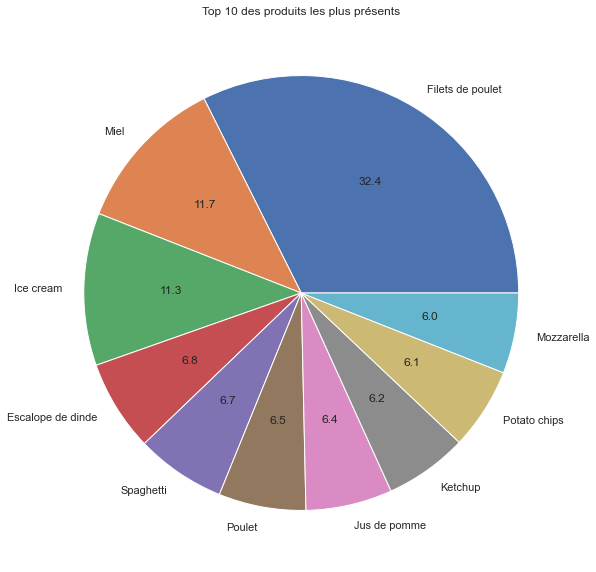

In [11]:
plt.figure(figsize=(10,10))
plt.pie(x=count["count"], autopct='%.1f', labels=count["product_name"])
plt.title("Top 10 des produits les plus présents")
plt.show()

In [12]:
print('Nombre de marques :', len(df['brands'].unique()))
print("Marque la plus représentée :", df['brands'].mode()[0])

Nombre de marques : 99111
Marque la plus représentée : Carrefour


In [13]:
count = df.groupby("brands").sum().sort_values(by='count', ascending=False).head(10)
count = count['count'].reset_index()

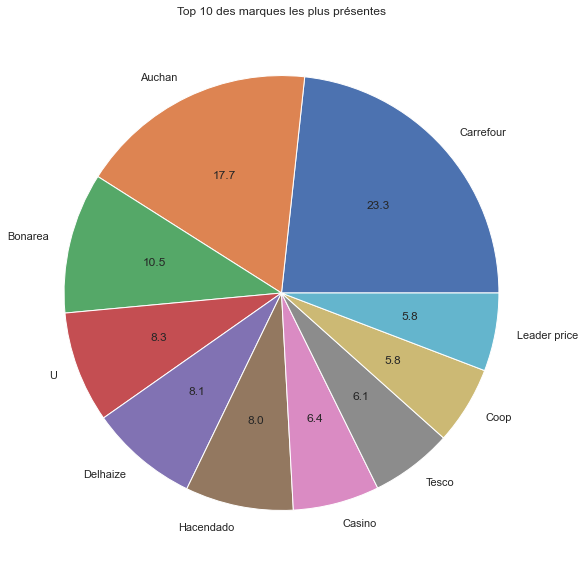

In [14]:
plt.figure(figsize=(10,10))
plt.pie(x=count["count"], autopct='%.1f', labels=count["brands"])
plt.title("Top 10 des marques les plus présentes")
plt.show()

In [15]:
print('Nombre de pays :', len(df['countries'].unique()))
print("Pays le plus représentée :", df['countries'].mode()[0])

Nombre de pays : 2
Pays le plus représentée : other


In [16]:
count = df.groupby("countries").sum().sort_values(by='count', ascending=False).head(10)
count = count['count'].reset_index()

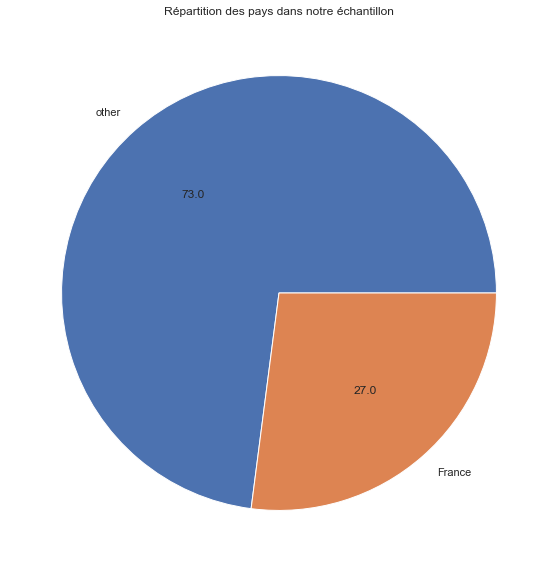

In [17]:
plt.figure(figsize=(10,10))
plt.pie(x=count["count"], autopct='%.1f', labels=count["countries"])
plt.title("Répartition des pays dans notre échantillon")
plt.show()

In [18]:
df.drop('count', axis=1, inplace=True)

In [19]:
print("Nombre d'années de création : ", len(df["created_years"].unique()))
print("Année avec le plus d'ajout de produits :", df['created_years'].mode()[0])

Nombre d'années de création :  7
Année avec le plus d'ajout de produits : 2020


In [20]:
print("Nombre d'années de modification : ", len(df['last_modified_years'].unique()))
print("Année avec le plus de mise à jour de produits :", df['last_modified_years'].mode()[0])

Nombre d'années de modification :  3
Année avec le plus de mise à jour de produits : 2020


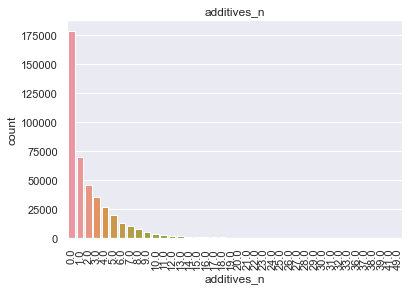

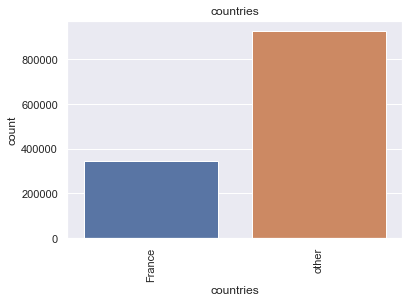

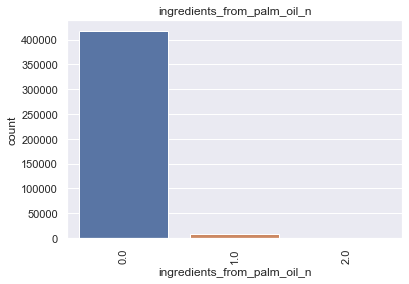

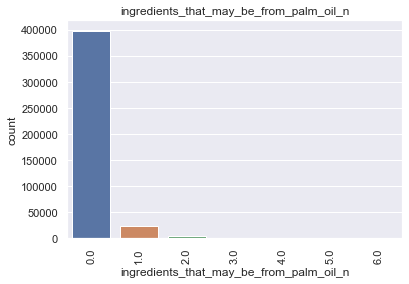

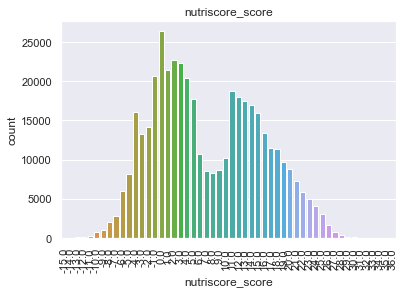

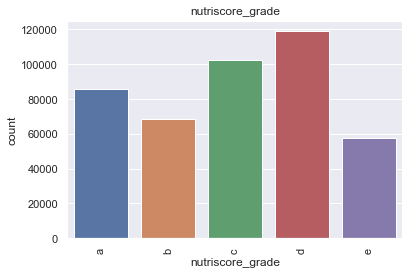

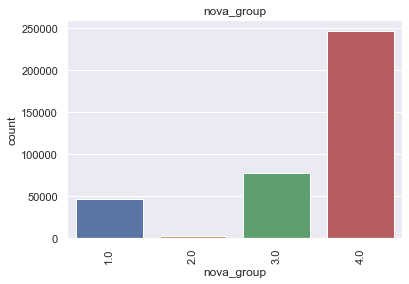

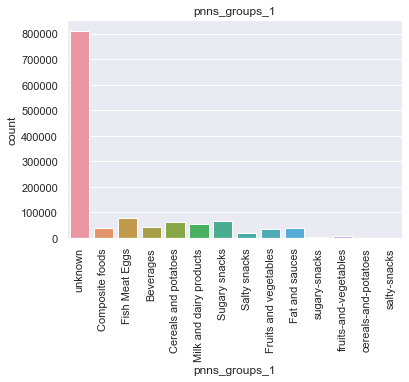

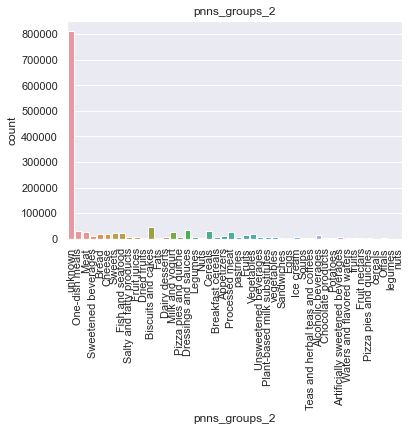

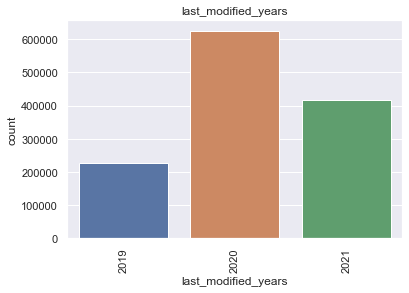

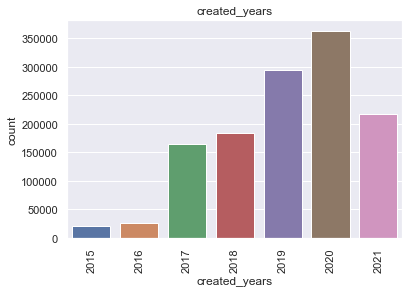

In [21]:
col_cat = ["additives_n", "countries", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n",
           "nutriscore_score", "nutriscore_grade", "nova_group", "pnns_groups_1", "pnns_groups_2", "last_modified_years", "created_years"]

for col in col_cat:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

## Description de la distribution des variables quantitatives

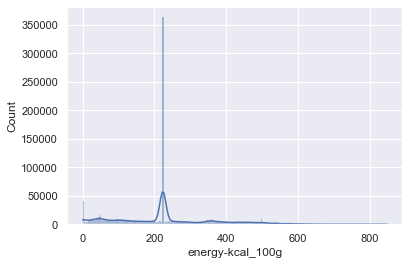

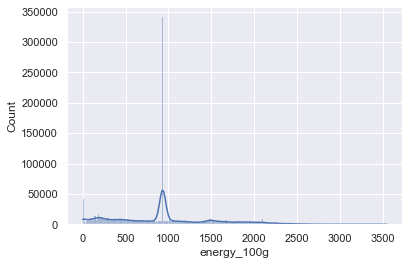

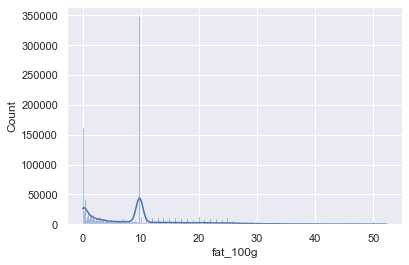

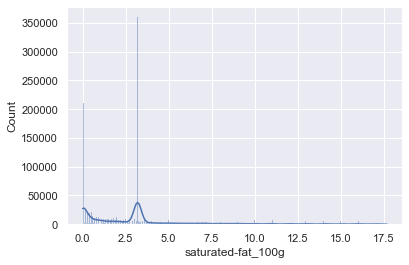

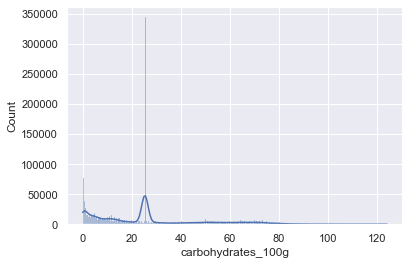

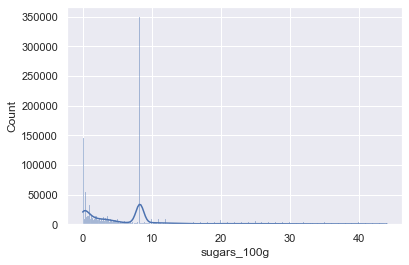

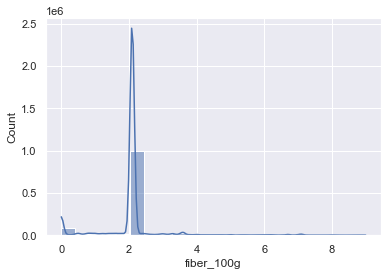

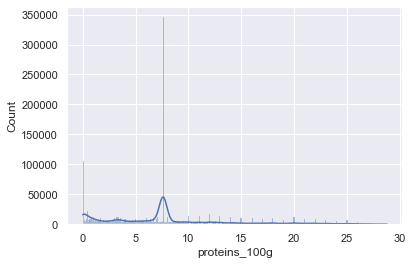

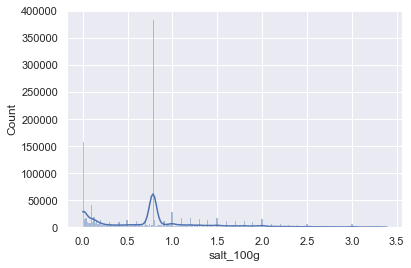

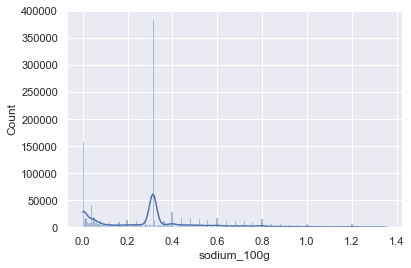

In [22]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.histplot(x=var, data=df, kde=True)
        plt.show()

In [23]:
pg.normality(df, method='normaltest', alpha=0.05)

,W,pval,normal
energy-kcal_100g,64347.221291,0.0,False
energy_100g,63254.874231,0.0,False
fat_100g,372609.537582,0.0,False
saturated-fat_100g,443797.077509,0.0,False
carbohydrates_100g,141435.105156,0.0,False
sugars_100g,430669.906348,0.0,False
fiber_100g,676728.225775,0.0,False
proteins_100g,188342.940580,0.0,False
salt_100g,227113.684752,0.0,False
sodium_100g,227122.725506,0.0,False


In [24]:
pg.homoscedasticity(df, method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.072516,1.0,True


Levene plus efficace que Bartlett car Bartlett dans cas de distribution normale


## Analyses descriptives des variables

### Analyses graphiques des variables

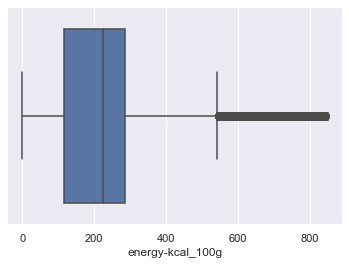

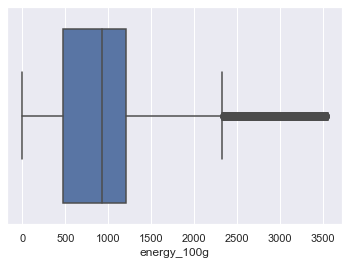

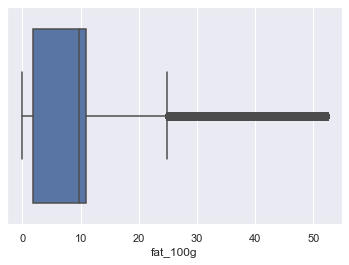

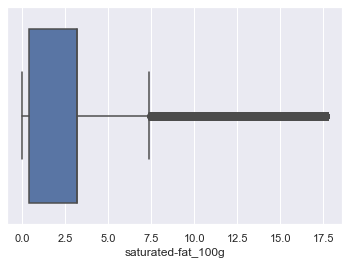

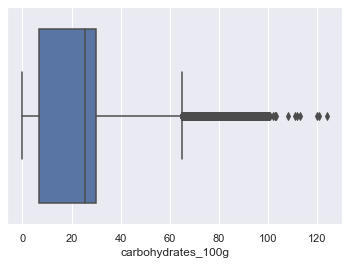

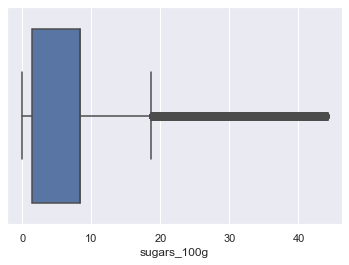

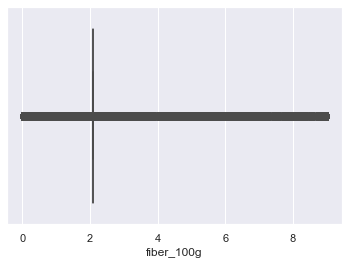

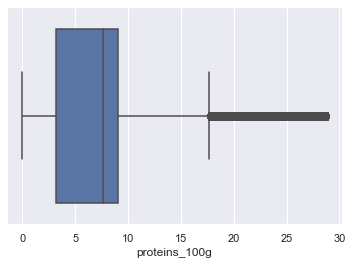

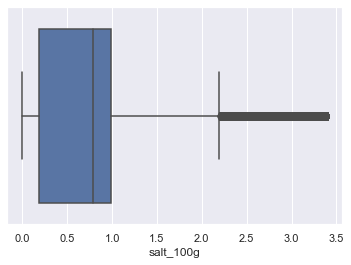

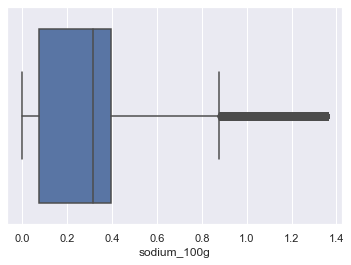

In [25]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.boxplot(x=var, data=df)
        plt.show()

### Analyses statistiques des variables

In [26]:
df.describe()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,created_years,last_modified_years
count,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06
mean,2.234660e+02,9.325546e+02,9.772948e+00,3.195321e+00,2.534341e+01,8.283347e+00,2.095763e+00,7.611919e+00,7.830954e-01,3.132375e-01,2.019097e+03,2.020151e+03
std,1.402924e+02,5.931586e+02,9.575300e+00,3.566504e+00,2.181692e+01,9.279625e+00,1.060480e+00,5.946362e+00,6.611190e-01,2.644483e-01,1.439252e+00,6.961083e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03,2.019000e+03
25%,1.160000e+02,4.680000e+02,1.800000e+00,4.000000e-01,6.700000e+00,1.360000e+00,2.095763e+00,3.210000e+00,1.900000e-01,7.600000e-02,2.018000e+03,2.020000e+03
50%,2.234660e+02,9.325546e+02,9.772948e+00,3.195321e+00,2.534341e+01,8.283347e+00,2.095763e+00,7.611919e+00,7.830954e-01,3.132375e-01,2.019000e+03,2.020000e+03
75%,2.860000e+02,1.213000e+03,1.100000e+01,3.195321e+00,3.000000e+01,8.283347e+00,2.095763e+00,9.000000e+00,9.925000e-01,3.970000e-01,2.020000e+03,2.021000e+03
max,8.480000e+02,3.548000e+03,5.233333e+01,1.770000e+01,1.240000e+02,4.410000e+01,9.000000e+00,2.880000e+01,3.392857e+00,1.357143e+00,2.021000e+03,2.021000e+03


# Analyses bivariées des variables

## Corrélation entre les variables quantitatives

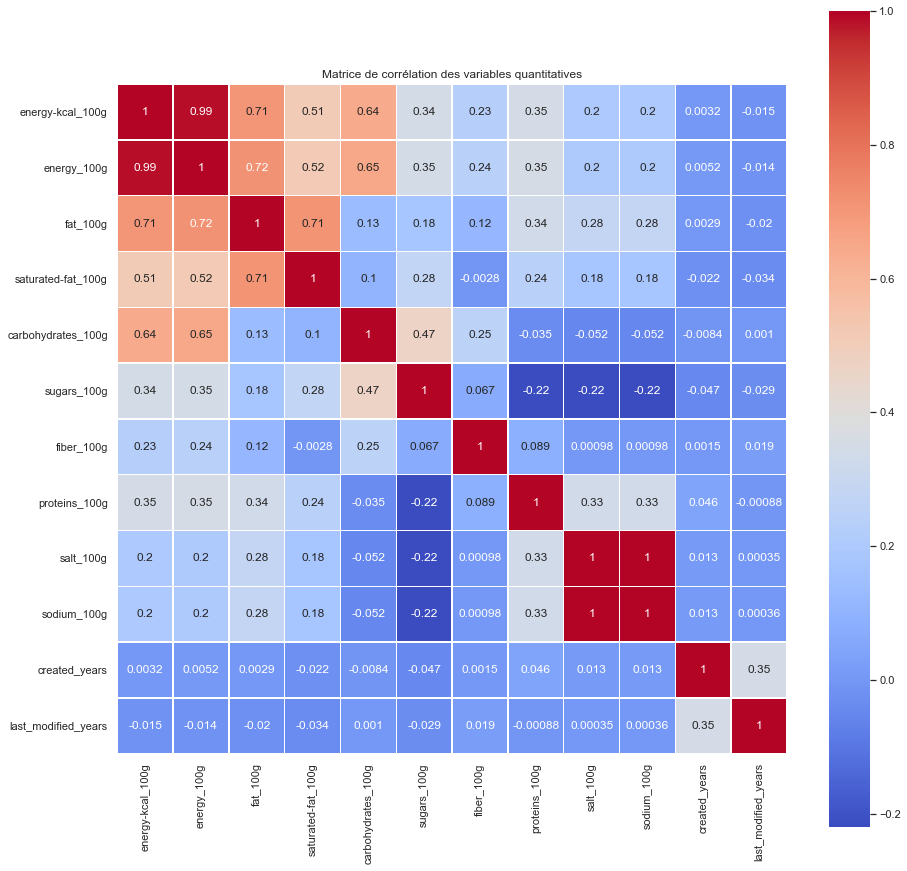

In [30]:
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()